<a href="https://colab.research.google.com/github/js10839/js10839/blob/main/DataSideProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davidcariboo/player-scores")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/528


In [ ]:
import pandas as pd
df = pd.read_csv(path+"/transfers.csv")
df.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,100000.0,Georgios Katris
4,360791,2025-12-31,25/26,6418,1030,Panetolikos,Argentinos Jrs.,0.0,1200000.0,Lucas Chaves


In [ ]:
df_2425 = df.loc[df.transfer_season == "24/25"].loc[df.transfer_fee > 0]
df_2425.reset_index(inplace=True)
df_2425 = df_2425.drop(columns="index")
df_2425.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,316889,2025-01-01,24/25,383,114977,PSV Eindhoven,San Diego FC,12000000.0,15000000.0,Hirving Lozano
1,482072,2025-01-01,24/25,520,51772,Cercle Brugge,Cincinnati,15300000.0,14000000.0,Kévin Denkey
2,248355,2024-09-13,24/25,62,126,Slavia Prague,C. Rizespor,1200000.0,1700000.0,Vaclav Jurecka
3,332798,2024-09-13,24/25,60,141,SC Freiburg,Galatasaray,6000000.0,15000000.0,Roland Sallai
4,461657,2024-09-13,24/25,999,589,NK Istra,Antalyaspor,500000.0,1000000.0,Oleksandr Petrusenko


In [ ]:
df_2425["transferTomarket"] = df_2425["transfer_fee"] - df_2425["market_value_in_eur"]
df_2425_pay = df_2425[["player_name","transferTomarket"]]
df_2425_pay.head()

,player_name,transferTomarket
0,Hirving Lozano,-3000000.0
1,Kévin Denkey,1300000.0
2,Vaclav Jurecka,-500000.0
3,Roland Sallai,-9000000.0
4,Oleksandr Petrusenko,-500000.0


In [ ]:
player_names = df_2425.player_name.tolist()

In [ ]:
df_players = pd.read_csv("drive/MyDrive/big_5_players_stats_2023_2024.csv")
df_players.columns = df_players.columns.str.lower()
df_players.head()
# len(df_players)

,rank,player,nation,position,squad,competition,age,year_born,playing time_mp,playing time_starts,...,per 90 minutes_gls,per 90 minutes_ast,per 90 minutes_g+a,per 90 minutes_g-pk,per 90 minutes_g+a-pk,per 90 minutes_xg,per 90 minutes_xag,per 90 minutes_xg+xag,per 90 minutes_npxg,per 90 minutes_npxg+xag
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19,2003,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17,2006,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [ ]:
df_players = df_players[df_players.player.isin(player_names)]
df_players.reset_index(inplace=True)

In [ ]:
df_players = df_players.drop(columns="index")
df_players.head()

,rank,player,nation,position,squad,competition,age,year_born,playing time_mp,playing time_starts,...,per 90 minutes_gls,per 90 minutes_ast,per 90 minutes_g+a,per 90 minutes_g-pk,per 90 minutes_g+a-pk,per 90 minutes_xg,per 90 minutes_xag,per 90 minutes_xg+xag,per 90 minutes_npxg,per 90 minutes_npxg+xag
0,9,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,20,2003,22,12,...,0.43,0.00,0.43,0.43,0.43,0.33,0.17,0.50,0.33,0.50
1,10,Abner,br BRA,DF,Betis,es La Liga,23,2000,23,15,...,0.00,0.06,0.06,0.00,0.06,0.01,0.06,0.07,0.01,0.07
2,27,Nathaniel Adjei,gh GHA,DF,Lorient,fr Ligue 1,20,2002,15,14,...,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.03,0.03,0.03
3,63,Luis Alberto,es ESP,MF,Lazio,it Serie A,30,1992,33,29,...,0.19,0.27,0.47,0.19,0.47,0.18,0.18,0.37,0.18,0.37
4,82,Pontus Almqvist,se SWE,"FW,MF",Lecce,it Serie A,24,1999,30,25,...,0.09,0.04,0.13,0.09,0.13,0.10,0.12,0.22,0.10,0.22


In [ ]:
df_2425_pay['payment_status'] = df_2425_pay.transferTomarket.apply(lambda x: "overpay" if x>0 else "underpay")
df_2425_pay.head()

<ipython-input-93-3cb00d454cd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2425_pay['payment_status'] = df_2425_pay.transferTomarket.apply(lambda x: "overpay" if x>0 else "underpay")


,player_name,transferTomarket,payment_status
0,Hirving Lozano,-3000000.0,underpay
1,Kévin Denkey,1300000.0,overpay
2,Vaclav Jurecka,-500000.0,underpay
3,Roland Sallai,-9000000.0,underpay
4,Oleksandr Petrusenko,-500000.0,underpay


In [ ]:
df_final = pd.merge(df_2425_pay, df_players, left_on="player_name", right_on="player", how="inner")
df_final.drop(columns="player", inplace=True)

In [ ]:
# df_fifa = pd.read_csv("drive/MyDrive/FIFA23_official_data.csv")
# df_fifa.columns = df_fifa.columns.str.lower()
# df_fifa = df_fifa.iloc[:,[1,6,7]]
# df_fifa.head()

In [ ]:
# df_final = pd.merge(df_final, df_fifa, left_on="player_name", right_on="name", how="inner")
# df_final.drop(columns="name", inplace=True)
# df_final.head()

In [ ]:
df_final = df_final.rename(columns = {"squad": "team","playing time_mp": "playing_time_mp", 'playing time_starts': 'playing_time_starts', "playing time_min": "playing_time_min", "playing time_90s": "playing_time_90s"})
df_final = df_final.drop(columns="rank")

In [ ]:
df_final.columns

Index(['player_name', 'transferTomarket', 'payment_status', 'nation',
       'position', 'team', 'competition', 'age', 'year_born',
       'playing_time_mp', 'playing_time_starts', 'playing_time_min',
       'playing_time_90s', 'performance_gls', 'performance_ast',
       'performance_g+a', 'performance_g-pk', 'performance_pk',
       'performance_pkatt', 'performance_crdy', 'performance_crdr',
       'expected_xg', 'expected_npxg', 'expected_xag', 'expected_npxg+xag',
       'progression_prgc', 'progression_prgp', 'progression_prgr',
       'per 90 minutes_gls', 'per 90 minutes_ast', 'per 90 minutes_g+a',
       'per 90 minutes_g-pk', 'per 90 minutes_g+a-pk', 'per 90 minutes_xg',
       'per 90 minutes_xag', 'per 90 minutes_xg+xag', 'per 90 minutes_npxg',
       'per 90 minutes_npxg+xag'],
      dtype='object')

In [ ]:
tmdf = df_final.iloc[:,:13]

In [ ]:
tmdf['position'] = tmdf['position'].apply(lambda x: x[:2] if len(x) > 2 else x)
tmdf["year_born"] = tmdf["year_born"].astype("int64")
tmdf["age"] = tmdf["age"].astype("int64")
tmdf["playing_time_mp"] = tmdf["playing_time_mp"].astype("int64")
tmdf["playing_time_starts"] = tmdf["playing_time_starts"].astype("int64")
tmdf["playing_time_min"] = tmdf["playing_time_min"].astype("int64")
tmdf["playing_time_90s"] = tmdf["playing_time_90s"].astype("float64")
tmdf = tmdf.drop_duplicates(subset=None, keep='first')
tmdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 0 to 262
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name          262 non-null    object 
 1   transferTomarket     262 non-null    float64
 2   payment_status       262 non-null    object 
 3   nation               262 non-null    object 
 4   position             262 non-null    object 
 5   team                 262 non-null    object 
 6   competition          262 non-null    object 
 7   age                  262 non-null    int64  
 8   year_born            262 non-null    int64  
 9   playing_time_mp      262 non-null    int64  
 10  playing_time_starts  262 non-null    int64  
 11  playing_time_min     262 non-null    int64  
 12  playing_time_90s     262 non-null    float64
dtypes: float64(2), int64(5), object(6)
memory usage: 28.7+ KB


In [ ]:
tmdf.groupby(["position"]).payment_status.value_counts()

position  payment_status
DF        overpay           46
          underpay          43
FW        underpay          54
          overpay           35
GK        overpay            6
          underpay           3
MF        underpay          41
          overpay           34
Name: count, dtype: int64

In [ ]:
tmdf.groupby(["position","competition"]).payment_status.value_counts()

position  competition         payment_status
DF        de Bundesliga       underpay           9
                              overpay            5
          eng Premier League  overpay            8
                              underpay           4
          es La Liga          underpay          10
                              overpay            6
          fr Ligue 1          overpay           16
                              underpay           5
          it Serie A          underpay          15
                              overpay           11
FW        de Bundesliga       underpay           9
                              overpay            5
          eng Premier League  overpay           11
                              underpay           8
          es La Liga          underpay          13
                              overpay            2
          fr Ligue 1          underpay           8
                              overpay            7
          it Serie A          underpay          16
                              overpay           10
GK        eng Premier League  overpay            2
                              underpay           2
          es La Liga          overpay            3
                              underpay           1
          it Serie A          overpay            1
MF        de Bundesliga       underpay           6
                              overpay            4
          eng Premier League  overpay           12
                              underpay           9
          es La Liga          underpay           6
                              overpay            2
          fr Ligue 1          overpay            8
                              underpay           8
          it Serie A          underpay          12
                              overpay            8
Name: count, dtype: int64

In [ ]:
tmdf.groupby(["position","year_born"]).payment_status.value_counts()

position  year_born  payment_status
DF        1992       underpay          2
          1993       underpay          3
          1994       underpay          4
                     overpay           2
          1995       overpay           1
                                      ..
MF        2003       overpay           4
                     underpay          2
          2004       overpay           3
                     underpay          1
          2005       overpay           2
Name: count, Length: 85, dtype: int64

In [ ]:
tmdf.groupby(["position","playing_time_starts"])[["payment_status","player_name"]].value_counts()

position  playing_time_starts  payment_status  player_name       
DF        0                    overpay         Dean Huijsen          1
                                               Julien Le Cardinal    1
                                               Mamadou Sarr          1
                                               Nadir Zortea          1
                                               Thilo Kehrer          1
                                                                    ..
MF        34                   underpay        Pascal Groß           1
          35                   underpay        Douglas Luiz          1
          36                   underpay        Aleix García          1
          37                   overpay         Walace                1
                               underpay        Conor Gallagher       1
Name: count, Length: 258, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='position', ylabel='count'>

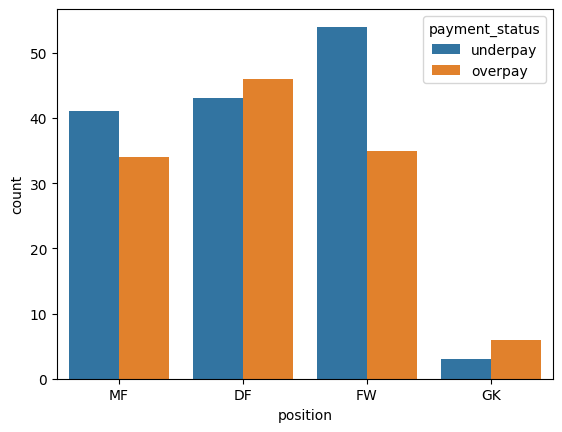

In [ ]:
sns.countplot(x="position",hue="payment_status", data=tmdf)

<Axes: xlabel='competition', ylabel='count'>

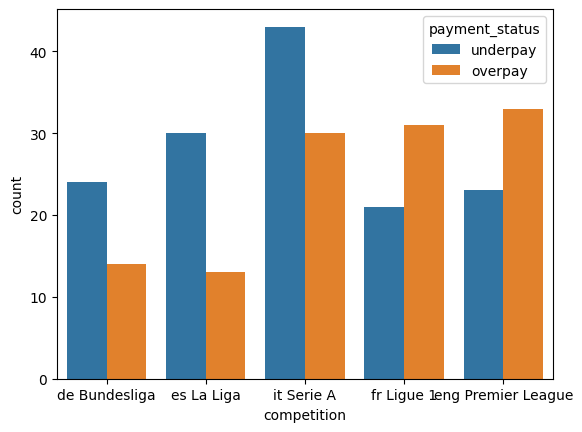

In [ ]:
sns.countplot(x="competition",hue="payment_status", data=tmdf)

In [ ]:
grouped = (tmdf.groupby(["position", "year_born", "payment_status"]).size().reset_index(name="count"))  # Count and Reset index and name the count column
grouped

,position,year_born,payment_status,count
0,DF,1992,underpay,2
1,DF,1993,underpay,3
2,DF,1994,overpay,2
3,DF,1994,underpay,4
4,DF,1995,overpay,1
...,...,...,...,...
80,MF,2003,overpay,4
81,MF,2003,underpay,2
82,MF,2004,overpay,3
83,MF,2004,underpay,1


<Axes: xlabel='year_born', ylabel='count'>

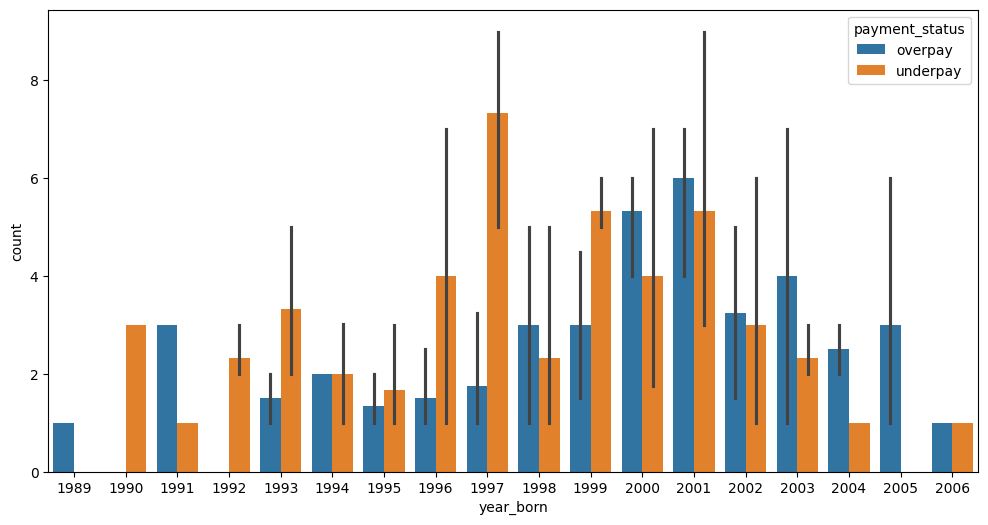

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="year_born",
    y="count",
    hue="payment_status",
    data=grouped.sort_values(by="year_born"),
)

In [ ]:
tmdf[tmdf["year_born"]==1991]

,player_name,transferTomarket,payment_status,nation,position,team,competition,age,year_born,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s
34,Jordan Ayew,1900000.0,overpay,gh GHA,FW,Crystal Palace,eng Premier League,31,1991,35,30,2543,28.3
85,Pascal Groß,-1000000.0,underpay,de GER,MF,Brighton,eng Premier League,32,1991,36,34,3114,34.6
168,Duván Zapata,600000.0,overpay,co COL,FW,Torino,it Serie A,32,1991,35,34,2880,32.0
169,Duván Zapata,600000.0,overpay,co COL,FW,Atalanta,it Serie A,32,1991,2,2,112,1.2
171,Willian José,-3000000.0,underpay,br BRA,FW,Betis,es La Liga,31,1991,33,25,1971,21.9
